# Visualizing How Convolution Detect Features 

In this notebook we look back again on the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) data but, instead of the simplistic one hidden layer neural network, we implement a two convolutional and two max pooling layers. We expect better performance compared to the previous case, but also we will see how the features of various dresses are found by the convolutional layers.  

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

#### Load Data from Keras Dataset

In [4]:
mnist_fashion = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist_fashion.load_data()

**Label and Class for the Fashion Dataset**

|Label | Class|
|---|---|
|0| Top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle Boot|

#### Normalize the Pixels
Since the pixel values are number between 0 and 255, it is better if we normalize the values between 0 and 1 and it is considered as one of the most important image _pre-processing_ steps. 

In [5]:
X_train = X_train/255.0
X_test = X_test/255.

#### Difference with Previous Example (1 Hidden dense Layer) 

* First, it's better to understand Convolution and What it Actually Does. Get started with Andrew Ng's Deep Learning Specialization and Check the amazing [CS231n Course Page](http://cs231n.github.io/convolutional-networks/)

* Since we are going to use [Conv2d](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers, check the descriptions to know about the input arguments, output etc. 

* Here we start with simplest form of convolution, $3\times 3$ without any stride and no padding. 

* Images are graysclaed, so only 1 channel. 

* Use relu activation function. 

Let's begin!

#### Reshape the Data

Treat the input data as tensors, with a format (batch, height, width, channels) 

In [6]:
X_train_reshape = X_train.reshape(60000, 28, 28, 1)
X_test_reshape = X_test.reshape(10000, 28, 28, 1)
print (X_test.shape)

(10000, 28, 28)


#### Create Layers Conv and Maxpool (Twice), Then Dense Layer 

In [8]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), 
    keras.layers.MaxPooling2D(2, 2), 
    keras.layers.Conv2D(32, (3, 3), activation='relu'), 
    keras.layers.MaxPooling2D(2, 2), 
    keras.layers.Flatten(), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

#### Understanding Model Summary

* 1st layer is 2D Conv Layer, takes input image of size (28, 28, 1). Filter dimension is (3, 3). Thus output shape $(w-f+1, h-f+1, n_c)$ where $n_c$ is the number of convolution filters. 

* Number of Parameters: Input image size (28, 28) with only one channel. Filter size (3, 3). Number of filters 32, thus total number of weights = $f\times f \times n_c \times 1 = 288$, number of bias paramters = number of filters (32). Thus total number of parameters $ 288 + 32 = 320 $. Let's verify this for the next conv layer.     

* In the next conv layer, number of channels = 32 (should be equal to the number of filters used in the previous conv layer which is $n_c$). <br> So total number of weights $f\times f\times n_c^{[L]} \times n_c^{[L-1]} = 3\times 3\times 32 \times 32 = 9216$. Number of bias paramters = 32 (number of filters), thus total number of paramters = $9216 + 32 = 9248$. Notations are influenced by Andrew Ng's Deep Learning Course.  

* Dense layer is also known as fully connected layer and thus depends on the number of neurons in the dense layer. Number of weights = $128 \times 800 = 102400$, 800 is obtained after flattening the image of shape (5, 5, 32). Number of bias = 128, thus total number of parameter = 102528.  

* In the final layer, the input of the dense layer is coming from last 128 layers and the output is connected to 10 neurons, thus total number of paramters $ 128 \times 10 + 10 = 1290$.  

### Compile Model and Fit Training Data

In [10]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_reshape, y_train, epochs=4)

Epoch 1/4
60000/60000 [==============================] - 19s 322us/sample - loss: 0.4708 - acc: 0.8303
Epoch 2/4
60000/60000 [==============================] - 19s 312us/sample - loss: 0.3189 - acc: 0.8832
Epoch 3/4
60000/60000 [==============================] - 19s 310us/sample - loss: 0.2755 - acc: 0.8988
Epoch 4/4
60000/60000 [==============================] - 19s 311us/sample - loss: 0.2456 - acc: 0.9098


#### Evaluate the Performance of the Model with Test Data

In [11]:
test_loss, test_acc = model.evaluate(X_test_reshape, y_test)
print (test_acc)

10000/10000 [==============================] - 1s 107us/sample - loss: 0.2939 - acc: 0.8922
0.8922


In [12]:
print (y_test[500:550])

[2 0 5 7 1 8 2 2 2 2 4 2 6 1 9 8 5 1 9 1 2 8 3 8 9 2 4 2 8 8 2 0 5 8 8 5 3
 9 4 3 4 4 5 1 0 1 2 0 6 9]


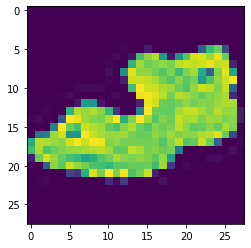

In [15]:
#Let's see some test images
 
plt.imshow(X_test.reshape(10000, 28, 28)[502])

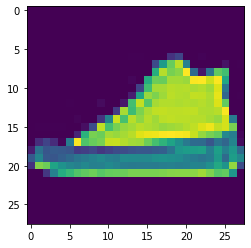

In [16]:
plt.imshow(X_test.reshape(10000, 28, 28)[503])

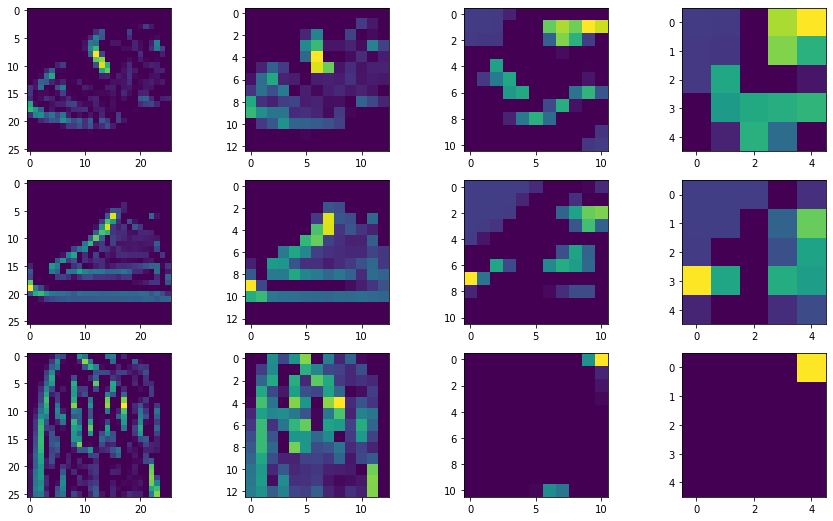

In [23]:
fig, axs = plt.subplots(3, 4, figsize=(15, 9))
first_im = 502 # sandal
sec_im = 503 # sneaker
third_im = 500 # pullover
CONVOLUTION_NUMBER=10



from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs=layer_outputs)

for x in range(0, 4):
    f1 = activation_model.predict(X_test_reshape[first_im].reshape(1, 28, 28, 1))[x]
    axs[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='viridis')
    axs[0,x].grid(False)
    f2 = activation_model.predict(X_test_reshape[sec_im].reshape(1, 28, 28, 1))[x]
    axs[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='viridis')
    axs[1,x].grid(False)
    f3 = activation_model.predict(X_test_reshape[third_im].reshape(1, 28, 28, 1))[x]
    axs[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='viridis')
    axs[2,x].grid(False)

# plt.savefig('Understanding_conv10.png', dpi=300)    

Let's see what's happening here. First we print out some of the test labels, each label represents different class. Keras api gives each conv, pool or dense etc as layers. So it's possible to get output of each layers with [layers.output](https://keras.io/layers/about-keras-layers/). Now we treat each item in the layer as separate model to see the outputs. So image (0, 0) shows the outout of first convolution. As you can see the dimension is $(26 \times 26)$. Then pooling reduces the size to half (0, 1), then one more conv layer reduces the size to $(11 \times 11)$. Finally the pooling layer reduces the size of the image to $(5 \times 5)$. 

Change the Convolution number to see how different filters identify different features.   